In [2]:
import pandas as pd #data processing
import numpy as np #linear algebra
import matplotlib.pyplot as plt # data visualization
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score, cross_val_predict


In [3]:
df= pd.read_csv('D:\Datascience\Bank note authentication\BankNote_Authentication.csv') # reading the Data

###### Data Inspection

In [4]:
df.head()

,variance,skewness,curtosis,entropy,class
0,3.62160,8.6661,-2.8073,-0.44699,0
1,4.54590,8.1674,-2.4586,-1.46210,0
2,3.86600,-2.6383,1.9242,0.10645,0
3,3.45660,9.5228,-4.0112,-3.59440,0
4,0.32924,-4.4552,4.5718,-0.98880,0


In [5]:
df=df.rename(columns={'class': 'Auth_status'}) #change the target variable name for convience

In [6]:
print(df.shape)

(1372, 5)


In [7]:
df.isnull().any() # checking if the is any null values present in the dataset

variance       False
skewness       False
curtosis       False
entropy        False
Auth_status    False
dtype: bool

The above data we can see we have independent variable and one dependent variable lets, Go for for details information regarding this dataset 

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1372 entries, 0 to 1371
Data columns (total 5 columns):
variance       1372 non-null float64
skewness       1372 non-null float64
curtosis       1372 non-null float64
entropy        1372 non-null float64
Auth_status    1372 non-null int64
dtypes: float64(4), int64(1)
memory usage: 53.7 KB


the above information implies that all variables are continious. But as per the business problem we understand that dependent variable should be categorical in nature lets do some more analysis

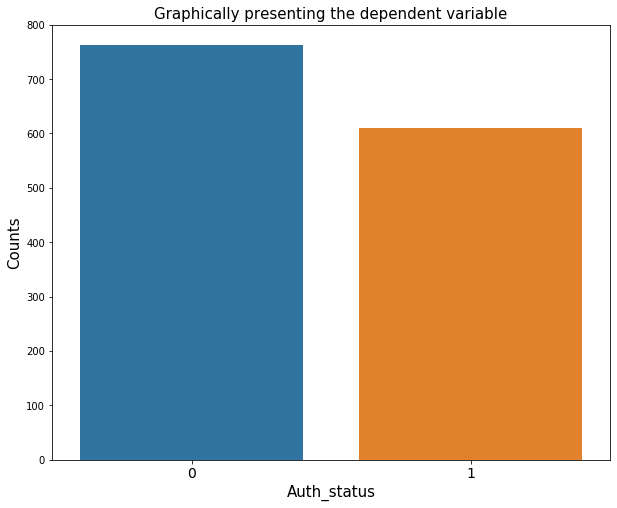

In [9]:
plt.figure(figsize=(10,8))
sns.countplot(x='Auth_status', data=df)
plt.xlabel('Auth_status', fontsize=15)
plt.ylabel('Counts', fontsize=15)
plt.title('Graphically presenting the dependent variable', fontsize=15)
plt.xticks(fontsize=14)
plt.show()

from the above description we can clearly see that the dependent variable is categorical in nature, because values of the "class" variable is either 1 or 0

So now is very much evident that the dependent variable is a categorical variable with two levels 1 and 0 in it.
there are around 

In [10]:
df['Auth_status']=df['Auth_status'].astype('category') #changed the datatype of the class variable into categorical

In [11]:
df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
variance,1372.0,NaN,NaN,NaN,0.433735,2.842763,-7.0421,-1.773000,0.49618,2.821475,6.8248
skewness,1372.0,NaN,NaN,NaN,1.922353,5.869047,-13.7731,-1.708200,2.31965,6.814625,12.9516
curtosis,1372.0,NaN,NaN,NaN,1.397627,4.310030,-5.2861,-1.574975,0.61663,3.179250,17.9274
entropy,1372.0,NaN,NaN,NaN,-1.191657,2.101013,-8.5482,-2.413450,-0.58665,0.394810,2.4495
Auth_status,1372.0,2.0,0.0,762.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


##### Target Variable: inspection 

In [12]:
df['Auth_status'].value_counts()

0    762
1    610
Name: Auth_status, dtype: int64

In [13]:
size=[df.Auth_status[df['Auth_status']==1].count(), df.Auth_status[df['Auth_status']==0].count() ]


In [14]:
label=['Authenticated', 'Not_authenticated']

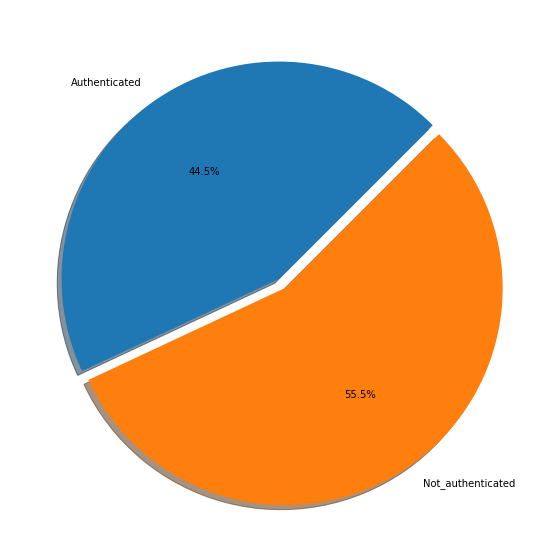

In [15]:
plt.figure(figsize=(10,10))
plt.pie(size, labels=label, explode=(0,0.05), shadow=True, autopct='%1.1f%%', startangle=45)
plt.show()

Almost 44.5% of the data is authenticated

#### Out-Lier analysis

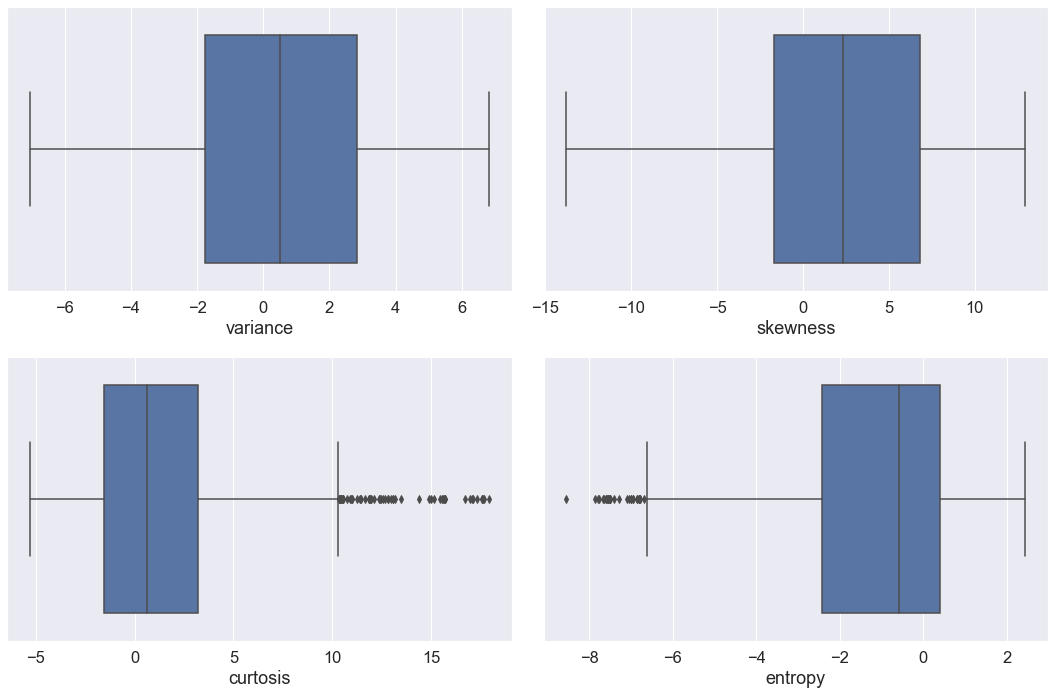

In [16]:
sns.set(font_scale=1.5)
plt.figure(figsize=(15,10))
n=1
for col in df.select_dtypes('float64'):
    plt.subplot(2,2,n)
    sns.boxplot(df[col])
    plt.tight_layout()
    n=n+1
        

variace and skewness are not having any outliers. where as curtosis and entropy show some outliers. which are are not necessarily outliers. these are call as business outliers which means they add value to the data set

#### Univariate Analysis

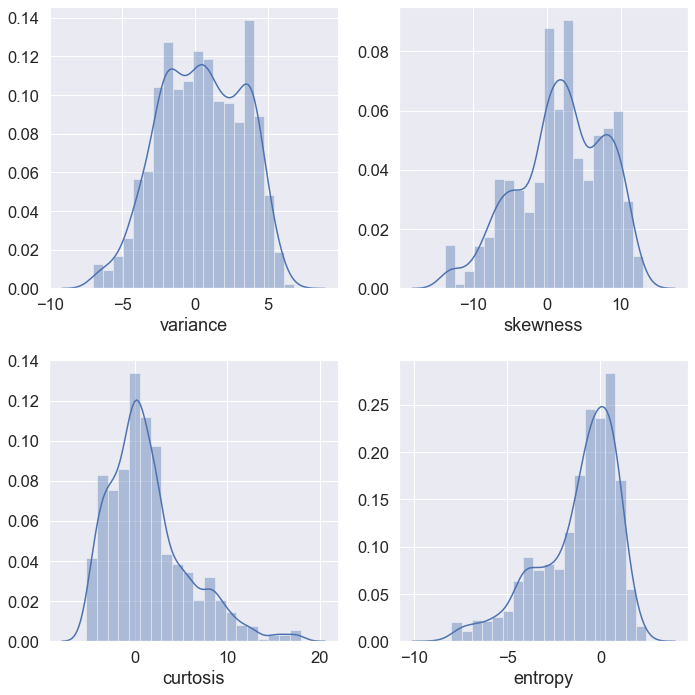

In [17]:
n=1
plt.figure(figsize=(10,10))
for col in df.select_dtypes('float64'):
    plt.subplot(2,2,n)
    sns.distplot(df[col], kde=True, bins=20)
    plt.tight_layout()
    n=n+1
    

Curtosis is positively skewed, 
Entropy and skewnessis negatively skewed,

##### Bi-Variate Analysis

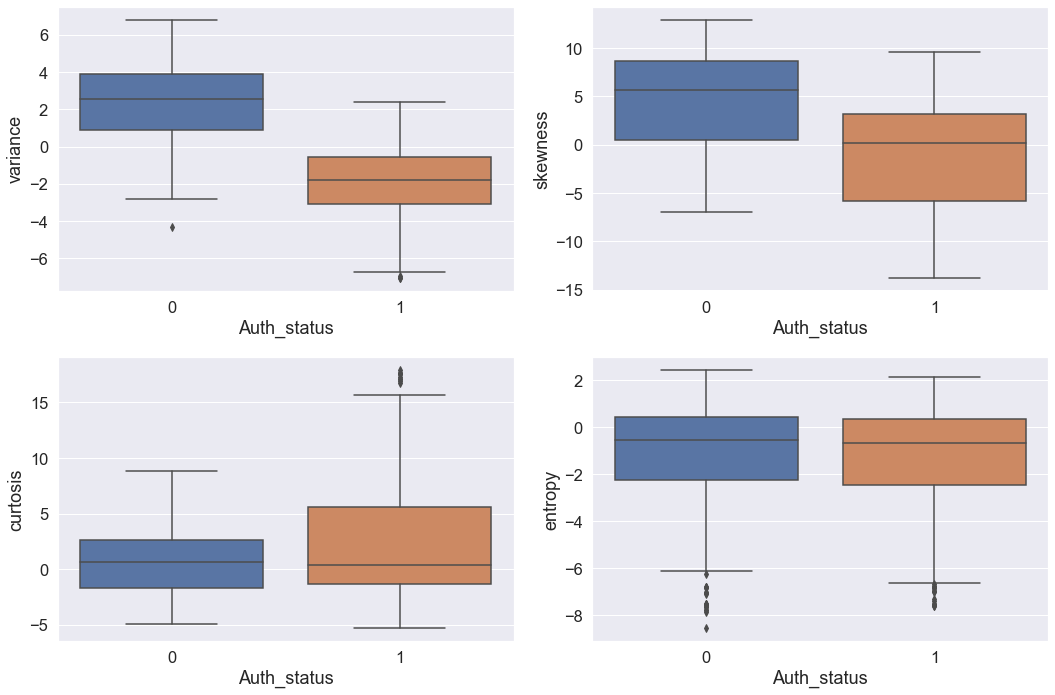

In [18]:
plt.figure(figsize=(15,10))
n=1
for col in df.select_dtypes('float64'):
    plt.subplot(2,2,n)
    sns.boxplot(x=df['Auth_status'], y=df[col])
    plt.tight_layout()
    n=n+1

using the above graph we can see the relationship between the target variable and independent variable.

Variace : if we look at the  behaviour of target variable with respect to variance the inter quartile range between 0 to -3 for authenticated bank note where as  the inter quartile range between 1 to 4 for non authenticated bank note. We ca say that the this variable will be significant variable for this business problem

skewness: similarly when we look at the this variable the IQR for non authenticated bank note lies between 1 to 9 where as the IQR for authenticated bank note lies between -7  to 4. we can say this variable could also be a significant variable

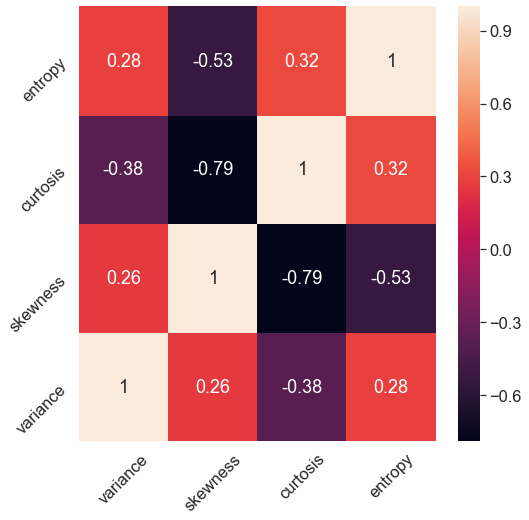

In [19]:
plt.figure(figsize=(8,8))
corr=np.round(df.corr(),2)
ax=sns.heatmap(corr, annot=True)
bottom, top=ax.get_ylim()
ax.set_ylim(top-0.5, bottom+0.5)
plt.xticks(rotation=45)
plt.yticks(rotation=45)
plt.show()

We see a lot a strong negative correlation between skewness and curtosis. earlier we also saw that skewess could be a significant variable for the target variable. This negative correlation of curtosis with skewness might be an important point to be considered

##### Data Preprocessing 

Lets start processing the data set before fitting the models 

In [20]:
features=[]
for col in df.select_dtypes('float64'):
    features.append(col)

In [21]:
nums=df.loc[:,features]
numeric=MinMaxScaler().fit_transform(nums)
x=pd.DataFrame(numeric, columns=features)


In [22]:
feature=x
x.head() #features


,variance,skewness,curtosis,entropy
0,0.769004,0.839643,0.106783,0.736628
1,0.835659,0.820982,0.121804,0.644326
2,0.786629,0.416648,0.310608,0.786951
3,0.757105,0.871699,0.054921,0.450440
4,0.531578,0.348662,0.424662,0.687362


In [23]:
y=df.drop(['variance', 'skewness', 'curtosis', 'entropy'], axis=1)

In [24]:
target=y
y.head() # target

,Auth_status
0,0
1,0
2,0
3,0
4,0


In [25]:
x_train, x_test, y_train, y_test=train_test_split(x,y, test_size=0.2, random_state=1)

In [26]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape) 

(1097, 4)
(275, 4)
(1097, 1)
(275, 1)


Logistic Regression

In [27]:
logreg=LogisticRegression()
logistic=logreg.fit(x_train,y_train)
ypred_log=logistic.predict(x_test)
logreg_score=round(logreg.score(x_train,y_train)*100,2)
print("score of logistic regression:",logreg_score)

#calculating the accurarcy between y test and y predicted
accuracy_logreg=accuracy_score(y_test,ypred_log)
print("accuracy of logitic regression is:",round(accuracy_logreg*100,2) )



score of logistic regression: 95.44
accuracy of logitic regression is: 94.91


C:\Users\hp\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\hp\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


KNN Classifier

In [28]:
k_model=KNeighborsClassifier(n_neighbors=5)
knn=k_model.fit(x_train,y_train)
ypred_knn=knn.predict(x_test)
knn_score=round(knn.score(x_train, y_train)*100,2)
print("KNN score is:", knn_score)

#accuracy between y test and predicted values
accuracy_knn=accuracy_score(y_test, ypred_knn)
print("accuracy of knn is:", round(accuracy_knn*100,2))


C:\Users\hp\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  


KNN score is: 99.82
accuracy of knn is: 100.0


We can clearly see thet the knn model overfits the problem. knn is not apt of this business case

Decision Tree Classifier:

In [29]:
DT=DecisionTreeClassifier()
dtree=DT.fit(x_train,y_train)
ypred_tree=dtree.predict(x_test)
dtree_score=round(dtree.score(x_train,y_train)*100,2)
print('score of Decaion Tree model:', dtree_score)


#accuracy between y test and predicted values
accuracy_tree=accuracy_score(y_test, ypred_tree)
print("accuracy of Decision tree is:", round(accuracy_tree*100,2))


score of Decaion Tree model: 100.0
accuracy of Decision tree is: 97.45


The Decision Tress Classifier also seems to over fit the business case

Randome Forest Classifier

In [30]:
forest=RandomForestClassifier(n_estimators=100, min_samples_leaf=3)
random=forest.fit(x_train, y_train)
ypred_forest=random.predict(x_test)
forest_score=round(random.score(x_train,y_train)*100,2)
print('Accuracy score of Random Forest model:', forest_score)

#accuracy between y test and predicted values
accuracy_forest=accuracy_score(y_test, ypred_forest)
print("accuracy of Random Forest is:", round(accuracy_forest*100,2))

C:\Users\hp\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


Accuracy score of Random Forest model: 100.0
accuracy of Random Forest is: 99.64


We can clearly see the out of all the models fitted. Logistic Regression is a better fit for the business problem. Reast all the model tend to over fit which is not desirable.

Lets do a K-fold cross validation to check double check the accuracy score

In [31]:
scores=cross_val_score(logreg, x_train, y_train, cv=7, scoring='accuracy')
print("Scores", scores)
print("Mean", round(scores.mean()*100,2))
print("Scores standard deviation",round (scores.std()*100,2))

Scores [0.96835443 0.96202532 0.94267516 0.94871795 0.94230769 0.96153846
 0.94230769]
Mean 95.26
Scores standard deviation 1.03


C:\Users\hp\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\hp\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\hp\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\hp\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\hp\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.

We have a mean value of accuracy score 95.06 with a standard deviation of 1

Lets check the classification report

In [34]:
classification=classification_report(y_test, ypred_log)
print(classification)

              precision    recall  f1-score   support

           0       0.95      0.96      0.96       157
           1       0.95      0.93      0.94       118

    accuracy                           0.95       275
   macro avg       0.95      0.95      0.95       275
weighted avg       0.95      0.95      0.95       275



In [35]:
matrix=confusion_matrix(y_test, ypred_log)
print (matrix)

[[151   6]
 [  8 110]]


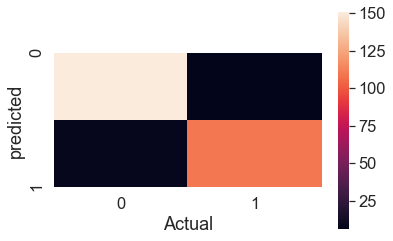

In [36]:
sns.heatmap(matrix, square=True)
plt.xlabel('Actual')
plt.ylabel('predicted')
plt.show()